# WeatherPy

In [1]:
# Dependencies and Setup
#!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
now = datetime.datetime.now()
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
print(weather_api_key)

9fc6f6a87957b5e0829be769afac7e46


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
units = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"
weather_list = []
i=1
j=1
n=1
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    if j % 50 ==0:
        time.sleep(60)
        n = n+1
        i = 1
    try:
        weather_dict = {}
        query_url = f"{url}&q={city}"
        #print(query_url)
        #print(requests.get(query_url))
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        temperature = weather_json["main"]["temp_max"]
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        humidity = weather_json["main"]["humidity"]
        cloudy = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        #date = weather_json["sys"]["country"]
        weather_dict["Cities"] = city
        weather_dict["Max Temp"] = temperature
        weather_dict["Lat"] = latitude
        weather_dict["Lng"] = longitude
        weather_dict["Humidity"] = humidity
        weather_dict["Wind Speed"] = wind
        weather_dict["Cloudiness"] = cloudy
        weather_dict["Country"] = country
        weather_list.append(weather_dict)
        print(f"Processing Record {i} in set {n}| {city}")
        i=i+1
        j = j+1
    except:
        print("City not found. Skipping...")
        j = j+1



Beginning Data Retrieval
-----------------------------
Processing Record 1 in set 1| pathein
Processing Record 2 in set 1| darnah
Processing Record 3 in set 1| kaitangata
Processing Record 4 in set 1| chokurdakh
Processing Record 5 in set 1| parrita
Processing Record 6 in set 1| rikitea
Processing Record 7 in set 1| jamestown
Processing Record 8 in set 1| caravelas
Processing Record 9 in set 1| vetovo
Processing Record 10 in set 1| hobart
Processing Record 11 in set 1| saint-philippe
Processing Record 12 in set 1| hasaki
Processing Record 13 in set 1| vaxjo
Processing Record 14 in set 1| avarua
Processing Record 15 in set 1| emba
Processing Record 16 in set 1| lata
Processing Record 17 in set 1| mataura
Processing Record 18 in set 1| yellowknife
Processing Record 19 in set 1| kano
Processing Record 20 in set 1| mason city
Processing Record 21 in set 1| bagotville
Processing Record 22 in set 1| esso
Processing Record 23 in set 1| mayumba
Processing Record 24 in set 1| ubinskoye
Processi

Processing Record 9 in set 5| sioux lookout
Processing Record 10 in set 5| puerto gaitan
Processing Record 11 in set 5| uvat
Processing Record 12 in set 5| praia
Processing Record 13 in set 5| faanui
Processing Record 14 in set 5| changji
Processing Record 15 in set 5| kutum
Processing Record 16 in set 5| khatanga
City not found. Skipping...
Processing Record 17 in set 5| kodiak
Processing Record 18 in set 5| port hedland
Processing Record 19 in set 5| codrington
Processing Record 20 in set 5| taltal
Processing Record 21 in set 5| kodinsk
City not found. Skipping...
Processing Record 22 in set 5| gogrial
Processing Record 23 in set 5| ahipara
City not found. Skipping...
Processing Record 24 in set 5| chama
Processing Record 25 in set 5| valdivia
Processing Record 26 in set 5| kruisfontein
Processing Record 27 in set 5| bayanday
City not found. Skipping...
Processing Record 28 in set 5| shchors
Processing Record 29 in set 5| batagay
Processing Record 30 in set 5| benguela
Processing Rec

Processing Record 22 in set 9| pyapon
Processing Record 23 in set 9| grand-santi
Processing Record 24 in set 9| giyon
Processing Record 25 in set 9| viedma
Processing Record 26 in set 9| grants
Processing Record 27 in set 9| college
Processing Record 28 in set 9| boddam
Processing Record 29 in set 9| saint andrews
Processing Record 30 in set 9| lingsugur
Processing Record 31 in set 9| ingraj bazar
Processing Record 32 in set 9| itarema
Processing Record 33 in set 9| cotonou
Processing Record 34 in set 9| coihaique
Processing Record 35 in set 9| abramovka
Processing Record 36 in set 9| petropavlovsk-kamchatskiy
Processing Record 37 in set 9| chumikan
Processing Record 38 in set 9| samarai
Processing Record 39 in set 9| garissa
Processing Record 40 in set 9| herat
City not found. Skipping...
Processing Record 41 in set 9| saldanha
Processing Record 42 in set 9| eyl
Processing Record 43 in set 9| bonavista
Processing Record 44 in set 9| guanica
City not found. Skipping...
Processing Recor

### Convert Raw Data to DataFrame

In [5]:
weather = pd.DataFrame(weather_list)
weather.to_csv("weather_info.csv")
weather.head()


,Cities,Max Temp,Lat,Lng,Humidity,Wind Speed,Cloudiness,Country
0,pathein,84.15,16.78,94.73,77,8.81,2,MM
1,darnah,70.81,32.77,22.64,68,21.21,44,LY
2,kaitangata,52.00,-46.28,169.85,60,3.00,3,NZ
3,chokurdakh,20.75,70.63,147.92,96,5.03,82,RU
4,parrita,78.80,9.52,-84.32,65,8.05,40,CR


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_too_high = weather.loc[weather["Humidity"]>100]

In [7]:
#  Get the indices of cities that have humidity over 100%.
humidity_too_high

,Cities,Max Temp,Lat,Lng,Humidity,Wind Speed,Cloudiness,Country


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

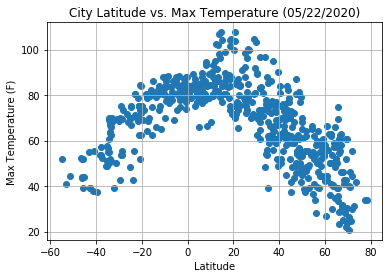

In [10]:
date = (now.strftime("%m/%d/%Y")) 
x = weather["Lat"]
y= weather["Max Temp"]
plt.scatter(x, y)
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("../Images/Lat_vs_Temp")

* It appears that the closer a country's latitude is to the equator (0) the higher the Max Termperature is.

## Latitude vs. Humidity Plot

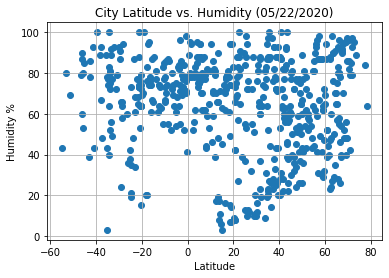

In [11]:
x = weather["Lat"]
y= weather["Humidity"]
plt.scatter(x, y)
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.savefig("../Images/Lat_vs_Humidity")

* The most instances of humidit % between 0-40 occur between latitudes of 20-60.
* There seem to be few countries around the equator with humidity % below 60.

## Latitude vs. Cloudiness Plot

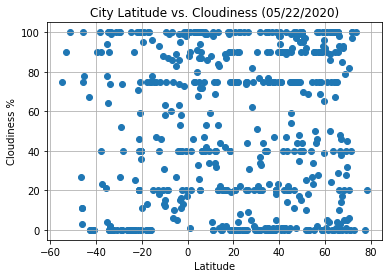

In [12]:
x = weather["Lat"]
y= weather["Cloudiness"]
plt.scatter(x, y)
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.savefig("../Images/Lat_vs_Cloudiness")

* Cloudiness appears to have no relationship to latitude.

## Latitude vs. Wind Speed Plot

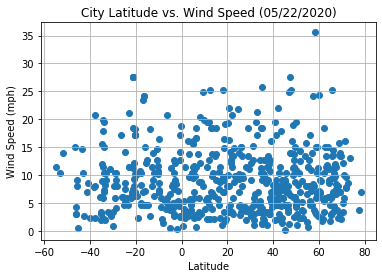

In [13]:
x = weather["Lat"]
y= weather["Wind Speed"]
plt.scatter(x, y)
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../Images/Lat_vs_Wind Speed")

* Wind speed appears to have little relationship to latitude.
* On the day these numbers were pulled (5/17/20) there appears to be few countries with wind speeds higher than 25 mph. Perhaps there were not many storms on this day.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def graph(x,y, x_label, y_label, equation_position, hemisphere):
    correlation = st.pearsonr(x, y)


    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x ,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,equation_position,fontsize=15,color="red")
    plt.ylabel(f'{y_label}')
    plt.xlabel(f'{x_label}')
    plt.title(f'{x_label} vs. {y_label} in the {hemisphere} hemisphere on ({date})')
    plt.savefig(f"../Images/{hemisphere}_{x_label}_vs_{y_label}")



    print(f"The correlation between both factors is {round(correlation[0],2)}")

    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
southern_hem = weather.loc[weather["Lat"]<0]
northern_hem = weather.loc[weather["Lat"]>=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.78


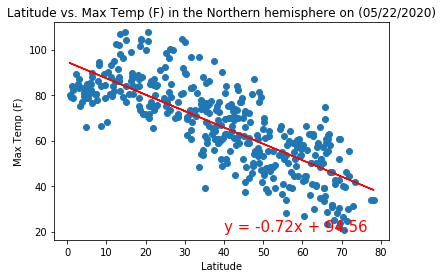

In [16]:
graph(northern_hem["Lat"],northern_hem["Max Temp"], "Latitude", "Max Temp (F)", (40,20), "Northern")

* There is a strong negative correlation between distance from the equator and Max Temperature.
* This means the further you are from the equator, the colder you max temperature tends to be.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.83


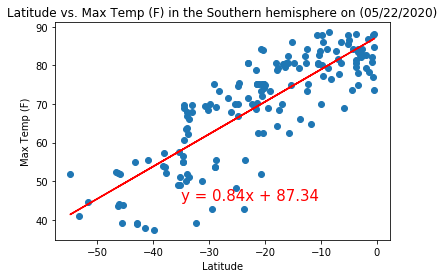

In [17]:
graph(southern_hem["Lat"],southern_hem["Max Temp"], "Latitude", "Max Temp (F)", (-35, 45), "Southern")

* There is a strog positive correlation between Max Temp and Latitude when looking at the southern hemisphere.
* This is because now as latitude values get larger they are getting closer to zero (or the equator) and tempertures are increasing

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.01


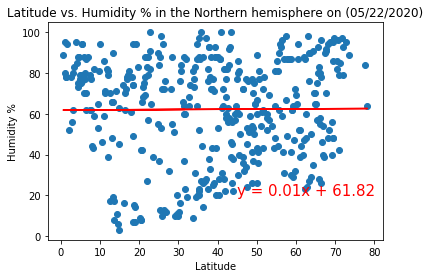

In [18]:
graph(northern_hem["Lat"],northern_hem["Humidity"], "Latitude", "Humidity %", (45, 20), "Northern")

* There appears to be little correlation between latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.07


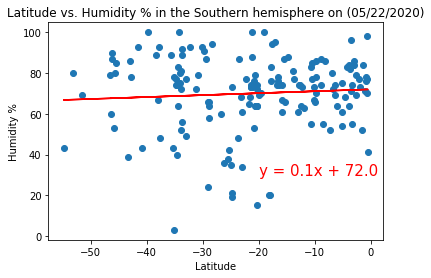

In [19]:
graph(southern_hem["Lat"],southern_hem["Humidity"], "Latitude", "Humidity %", (-20, 30), "Southern")

* There is still a very low correlation factor between humidity and latitude in the southern hemisphere.
* There appear to be fewer countries with humidity below 40% in the southern hemisphere than in the northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.02


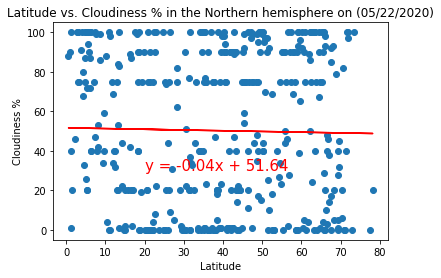

<Figure size 432x288 with 0 Axes>

In [20]:
graph(northern_hem["Lat"],northern_hem["Cloudiness"], "Latitude", "Cloudiness %", (20, 30), "Northern")
plt.savefig("../Images/NH_Cloudiness_vs_Lat")

* Cloudiness and latitude appear to have almost no correlation in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.1


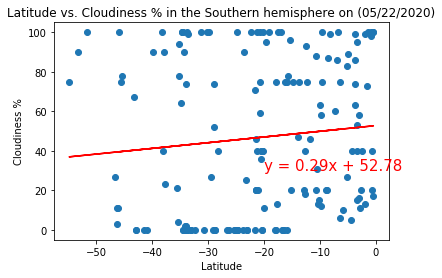

In [21]:
graph(southern_hem["Lat"],southern_hem["Cloudiness"], "Latitude", "Cloudiness %", (-20, 30), "Southern")

* Cloudiness and latitude appear to have almost no correlation in the southern hemisphere as well.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.04


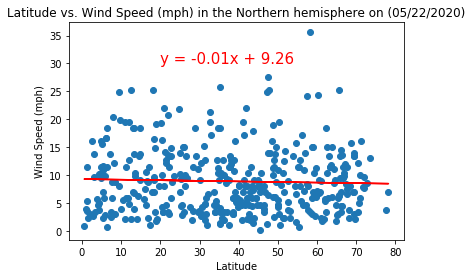

In [22]:
graph(northern_hem["Lat"],northern_hem["Wind Speed"], "Latitude", "Wind Speed (mph)", (20, 30), "Northern")

* Wind Speed appears to have no correlation with latitude in the northern hemisphere.
* Very few cities reported winds higher than 25 mph in the northern hemisphere on 5/17/20.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.02


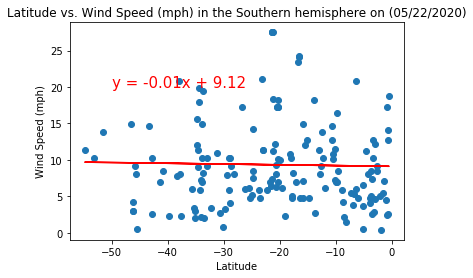

In [23]:
graph(southern_hem["Lat"],southern_hem["Wind Speed"], "Latitude", "Wind Speed (mph)", (-50, 20), "Southern")

* Wind Speed appears to have no correlation with latitude in the southern hemisphere.
* Very few countries had wind speeds above 20 mph in the southern hemisphere. This shows a slightly smaller distribution than in the northern hemisphere. However, this could be because there are fewer cities from the random sample in the southern hemisphere.